# **Problem Statement:**

**Build a sentiment analysis model using Recurrent Neural Networks (RNNs) to
classify movie reviews from the IMDB dataset into positive or negative
sentiments.**


**Dataset:**

The dataset comprises 25,000 movie reviews from IMDB, labeled by sentiment
(positive/negative). Reviews have been preprocessed, and each review is
encoded as a sequence of word indices (integers). The words in the dataset are
indexed by overall frequency in the dataset, allowing for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top20 most common words".

**Tasks to be Performed:**

**Data Preprocessing:**

● Load the IMDB dataset, keeping only the top 10,000 most frequently
occurring words.

● Pad the sequences so that they all have the same length.

**Model Building:**

● Create a Sequential RNN model using TensorFlow and Keras.

● The model should consist of an Embedding layer, a SimpleRNN layer, and
a Dense output layer.

● Compile the model, specifying the appropriate optimizer, loss function, and
metrics.

**Training:**

● Train the model on the preprocessed movie reviews, using a batch size of
128 and validating on 20% of the training data.

● Run the training for 10 epochs.

**Evaluation:**

Evaluate the model on the test set and report the accuracy.

**Expected Outcome:**

A trained RNN model that can classify movie reviews into positive or negative
sentiments, with an accuracy metric provided at the end of the training process.


# Libraries and Packages Used

In [42]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assumption before building

In [3]:
max_features = 10000      # Creating a vocabulary size
max_length = 150          # padding size

# Loading Dataset

In [43]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

# Padding

In [6]:
x_train = sequence.pad_sequences(x_train,maxlen=max_length)
x_test = sequence.pad_sequences(x_test,maxlen=max_length)

x_train.shape, x_test.shape

((25000, 150), (25000, 150))

# Building RNN Model

In [8]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features,32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1,activation='sigmoid'))

In [9]:
model_rnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# model fit

In [10]:
history = model_rnn.fit(x_train,y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.20,
                        verbose=1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.5715 - loss: 0.6626 - val_accuracy: 0.7550 - val_loss: 0.5053
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.8430 - loss: 0.3715 - val_accuracy: 0.8506 - val_loss: 0.3494
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9230 - loss: 0.2139 - val_accuracy: 0.8452 - val_loss: 0.3630
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9464 - loss: 0.1529 - val_accuracy: 0.8340 - val_loss: 0.4541
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9733 - loss: 0.0861 - val_accuracy: 0.8456 - val_loss: 0.4541
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9900 - loss: 0.0426 - val_accuracy: 0.8422 - val_loss: 0.5545
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9931 - loss: 0.0280 - val_accuracy: 0.8096 - val_loss: 0.5346
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9874 - loss: 0.0445 - v

# test loss and test accuracy

In [11]:
test_loss , test_accuracy = model_rnn.evaluate(x_test,y_test)
print(f"\nTest_Loss : {test_loss:.4f}\n")
print(f"Test_Accuracy : {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8260 - loss: 0.7046

Test_Loss : 0.7022

Test_Accuracy : 0.8267


# train_loss and train_accuracy

In [12]:
train_loss , train_accuracy = model_rnn.evaluate(x_train,y_train)
print(f"\nTrain_Loss : {train_loss:.4f}\n")
print(f"Train_Accuracy : {train_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9951 - loss: 0.0216

Train_Loss : 0.1383

Train_Accuracy : 0.9656


# let's visualize val_loss and val_accuraccy

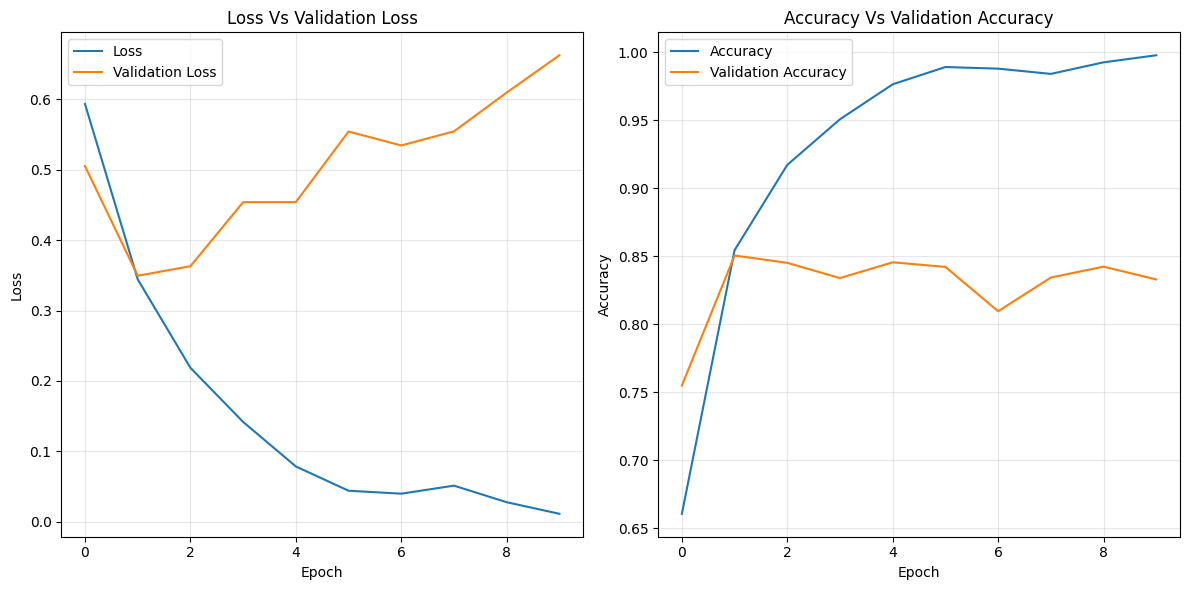

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss Vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.30)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = "Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Accuracy Vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.30)
plt.tight_layout()
plt.show()

# Predictions

In [21]:
pred = model_rnn.predict(x_test[10:20])

for i,prediction in enumerate(pred):
  sentiment = "Positive" if prediction>0.50 else "Negative"
  print(f"Review {i+1} // Predicted_sentiment : {sentiment} // Acutal_sentiment : {'POS' if y_test[i]==1 else 'NEG'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Review 1 // Predicted_sentiment : Positive // Acutal_sentiment : NEG
Review 2 // Predicted_sentiment : Negative // Acutal_sentiment : POS
Review 3 // Predicted_sentiment : Negative // Acutal_sentiment : POS
Review 4 // Predicted_sentiment : Negative // Acutal_sentiment : NEG
Review 5 // Predicted_sentiment : Positive // Acutal_sentiment : POS
Review 6 // Predicted_sentiment : Negative // Acutal_sentiment : POS
Review 7 // Predicted_sentiment : Positive // Acutal_sentiment : POS
Review 8 // Predicted_sentiment : Negative // Acutal_sentiment : NEG
Review 9 // Predicted_sentiment : Negative // Acutal_sentiment : NEG
Review 10 // Predicted_sentiment : Negative // Acutal_sentiment : POS


In [24]:
y_pred = model_rnn.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


In [33]:
y_pred_labels = []
for i in range(len(y_pred)):
  y = 1 if y_pred[i]>0.50 else 0
  y_pred_labels.append(y)
print(y_pred_labels)

[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 

# classification metrics

Accuracy_Score : 0.8267

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     12500
           1       0.86      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



-------------------------- Confusion Matrix -----------------------




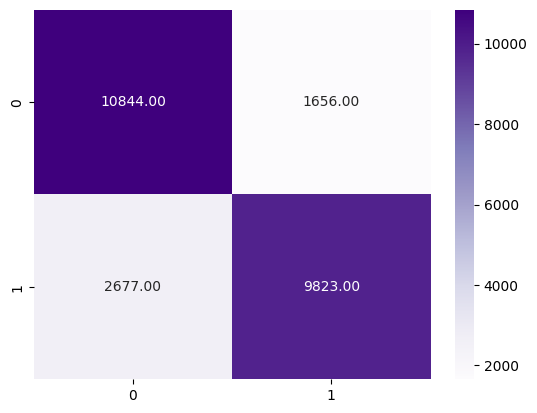

In [41]:
acc_score = accuracy_score(y_test,y_pred_labels)
print(f"Accuracy_Score : {acc_score:.4f}\n")

print(f"Classification Report\n {classification_report(y_test,y_pred_labels)}\n\n")

print("-------------------------- Confusion Matrix -----------------------\n\n")
sns.heatmap(confusion_matrix(y_test,y_pred_labels), cmap='Purples' , annot=True , fmt='.2f')
plt.show()

In [26]:
y_test

array([0, 1, 1, ..., 0, 0, 0])